In [1]:
import slideio
from utils import get_test_images, display_driver_test_image_info 
from utils import show_images, show_image, get_driver_test_images
from utils import show_scene_info, show_scenes, show_volume, extract_image_properties
from IPython.display import display
import json
import pandas as pd
import random
import json
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
from scipy.spatial import ConvexHull

# Test images
For the future demonstration of the library, we will be utilizing some test images. Information regarding the images and the drivers required for image processing is stored in the *image.json* file. The helper utility *get_test_images* loads this image information into a list for convenient access and utilization during the demonstration.

In [2]:
images = get_driver_test_images('VSI')
display_driver_test_image_info(images, 'VSI')

Image Path,Driver
./images/vsi-ets-test-jpg2k.vsi,VSI
./images/Image_Mouse13_PB_H7.vsi,VSI
./images/KXXM5V73XBHBK5ZVPMJT483PBR.vsi,VSI


In [3]:
extract_image_properties(images)

,Path,Scene index,Num Channels,Data Type,Compression,Width,Height,Z Slices,Z Frames
0,./images/vsi-ets-test-jpg2k.vsi,0,2,uint16,Jpeg2000,1645,1682,11,1
1,./images/Image_Mouse13_PB_H7.vsi,1,3,uint8,Jpeg,12151,12757,1,1
2,./images/Image_Mouse13_PB_H7.vsi,1,3,uint8,Jpeg,12151,12757,1,1
3,./images/KXXM5V73XBHBK5ZVPMJT483PBR.vsi,0,3,uint8,Uncompressed,608,600,1,1


Number of scenes: 4


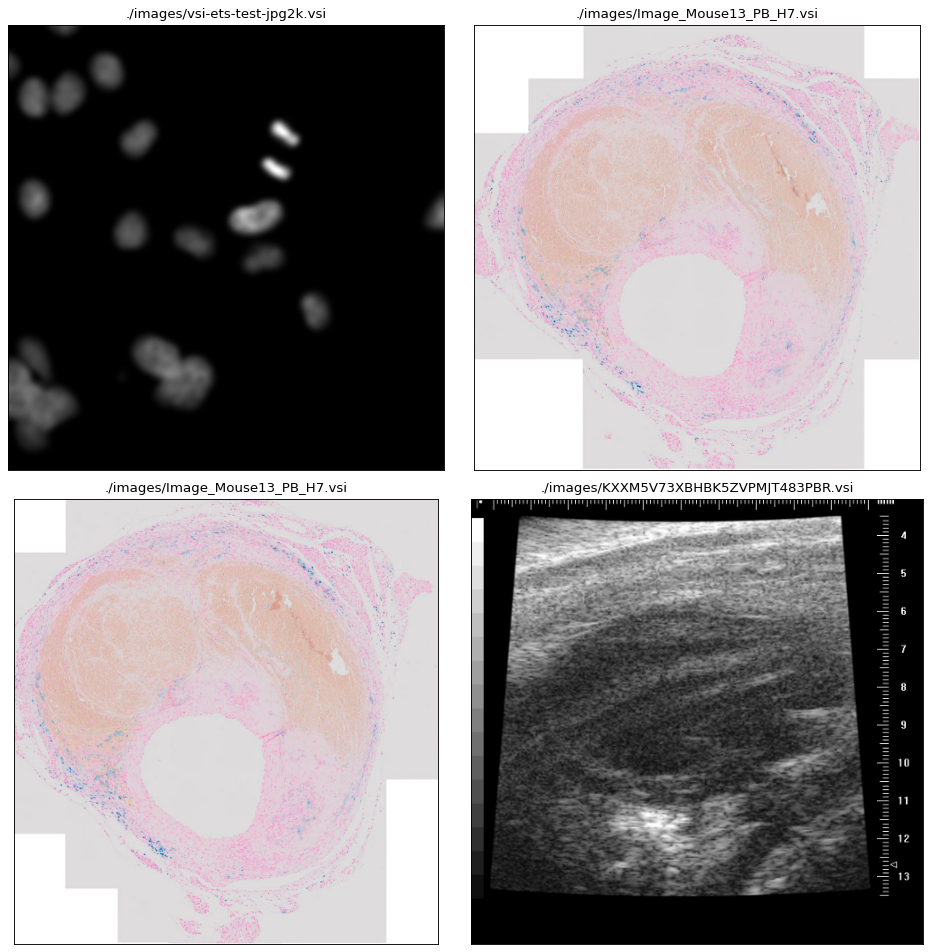

In [11]:
scenes = []
for image in images:
    slide = slideio.open_slide(image['path'],'VSI')
    num_scenes = slide.num_scenes
    for sc in range (0, num_scenes):
        scenes.append(slide.get_scene(sc))
show_scenes(scenes, 2, (500,500))

In [5]:
slide = slideio.open_slide(images[1]['path'],'VSI')
scene = slide.get_scene(1)
image = scene.read_block(size=(1000,0))

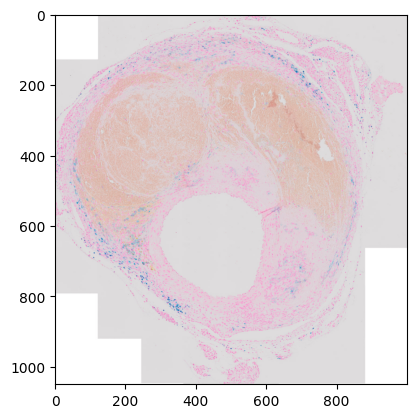

In [6]:
plt.imshow(image)

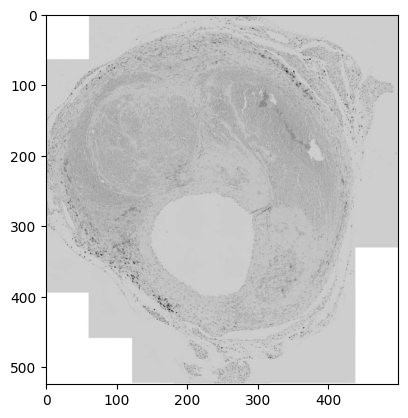

In [7]:
params = slideio.ColorTransformation()
params.color_space = slideio.ColorSpace.GRAY
gray_image = scene.apply_transformation([params]).read_block(size=(500,0))
plt.imshow(gray_image, cmap='gray')

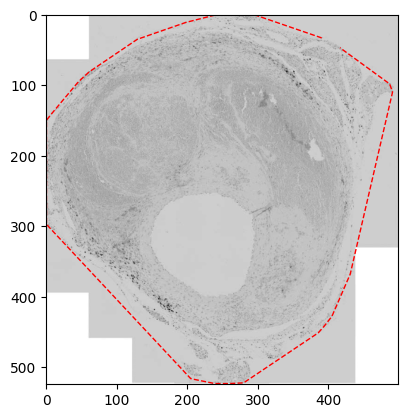

In [8]:
mask = gray_image < 200
contours = measure.find_contours(mask, 0.5, fully_connected='high', positive_orientation='low')
all_coords = np.concatenate(contours)
hull = ConvexHull(all_coords)
points = all_coords[hull.vertices]
plt.imshow(gray_image, cmap='gray')
plt.plot(points[:,1], points[:,0], 'r--', lw=1)
plt.show()

In [9]:
slide = slideio.open_slide(images[0]['path'],'AUTO')
scene = slide.get_scene(0)

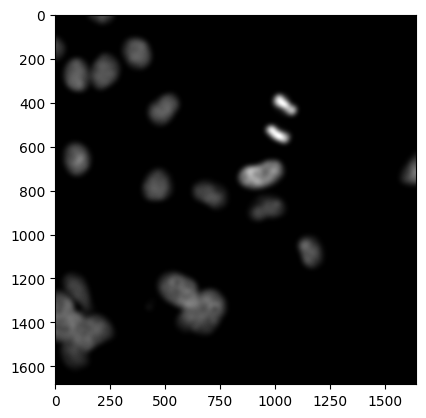

In [10]:
image1 = scene.read_block(channel_indices=[0], slices=(5,6))
plt.imshow(image1, cmap='gray')

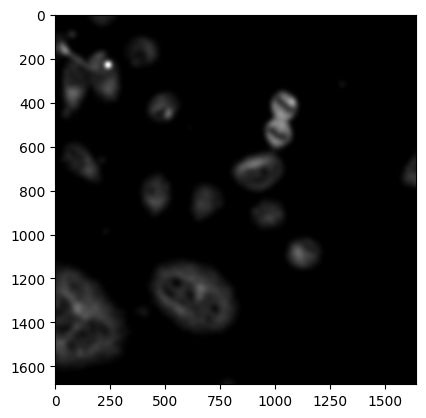

In [36]:
image2 = scene.read_block(channel_indices=[1], slices=(5,6))
plt.imshow(image2, cmap='gray')

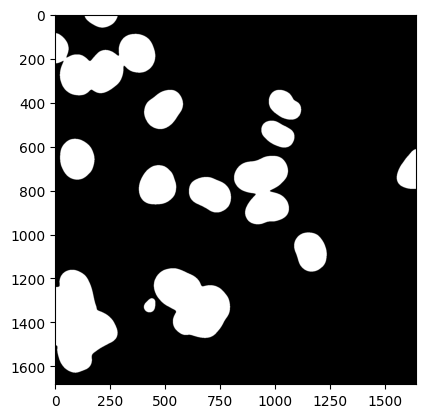

In [37]:
mask = image1 > 20
plt.imshow(mask,cmap='gray')

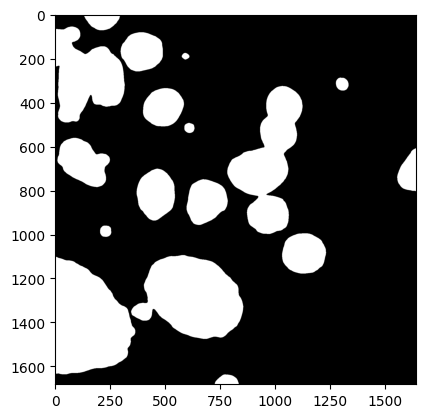

In [14]:
mask2 = image2 > 1
plt.imshow(mask2,cmap='gray')

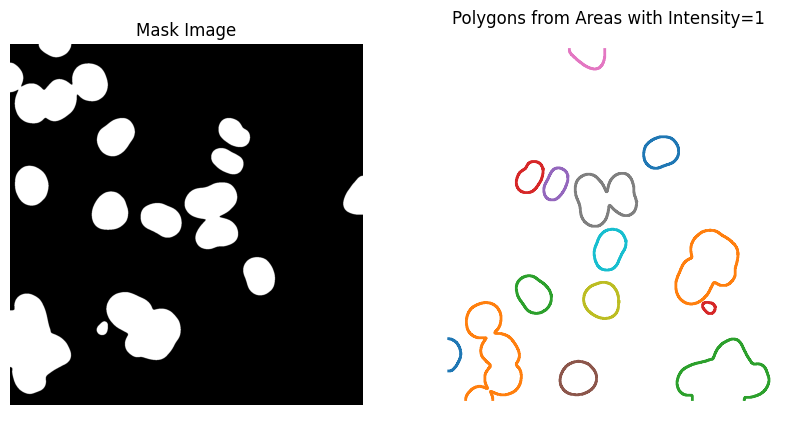

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import find_objects, label
from skimage import measure

def create_polygons(mask):
    # Find contours in the mask
    contours = measure.find_contours(mask, 0.5, fully_connected='high', positive_orientation='low')

    # Create a list to store the polygons
    polygons = []

    # Loop through each contour and create a polygon
    for contour in contours:
        # Convert the coordinates to integer values
        coords = np.round(contour).astype(int)
        
        # Create a polygon using the coordinates
        polygon = []
        for coord in coords:
            polygon.append(tuple(coord))
        polygons.append(polygon)

    return polygons

# Example usage:
# Replace 'mask_image.npy' with your actual file path or use a NumPy array directly
# For demonstration, creating a random 2D mask image
mask_image = mask

# Create polygons from areas with intensity=1
polygons = create_polygons(mask_image)

# Display the original mask image and the polygons using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(mask_image, cmap='gray', vmin=0, vmax=1)
plt.title('Mask Image')
plt.axis('off')

plt.subplot(1, 2, 2)
for polygon in polygons:
    coords = np.flipud(np.array(polygon).T)
    plt.plot(coords[1], coords[0], linewidth=2)
plt.title('Polygons from Areas with Intensity=1')
plt.axis('off')

plt.show()

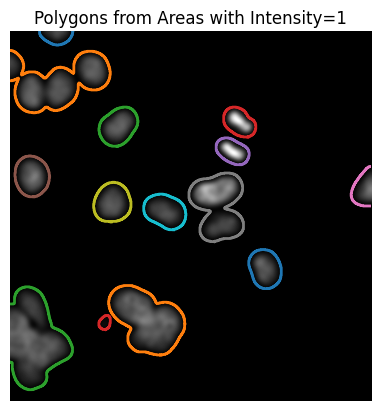

In [24]:
plt.imshow(image1, cmap='gray')
for polygon in polygons:
    coords = np.array(polygon).T
    plt.plot(coords[1], coords[0], linewidth=2)
plt.title('Polygons from Areas with Intensity=1')
plt.axis('off')

plt.show()

In [ ]:
polygons